## Importing Libraries

In [1]:
import tensorflow as tf # used to build and train deep learning models .
import matplotlib.pyplot as plt  # creates visualization and basically used for creating histograms and bar charts.
import seaborn as sns #statistical data representation , such as heatmap and predictions model.

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",            #it means that the label contains sub-directories
    label_mode="categorical",  #(for multiple classes) and  int - for labels are enclosed as integers , helps in binary vector format 
    class_names=None,
    color_mode="rgb",
    batch_size=32,     #Batch size is the number of samples that you feed into your model at each iteration of the training process or [smaller chunks of data]
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,  #helps to not split the dataset
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, #it dosent allow to crop to maintain the aspect ratio
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[174.25 164.25 163.25]
   [194.75 184.75 183.75]
   [181.   171.   170.  ]
   ...
   [177.25 168.25 171.25]
   [175.75 166.75 169.75]
   [170.   161.   164.  ]]

  [[182.75 172.75 171.75]
   [182.75 172.75 171.75]
   [192.   182.   181.  ]
   ...
   [182.5  173.5  176.5 ]
   [179.75 170.75 173.75]
   [186.5  177.5  180.5 ]]

  [[183.5  173.5  172.5 ]
   [193.25 183.25 182.25]
   [184.5  174.5  173.5 ]
   ...
   [166.75 157.75 160.75]
   [177.25 168.25 171.25]
   [174.   165.   168.  ]]

  ...

  [[133.25 109.25 109.25]
   [134.   110.   110.  ]
   [129.   105.   105.  ]
   ...
   [145.5  130.5  137.5 ]
   [116.75 101.75 108.75]
   [125.5  110.5  117.5 ]]

  [[127.5  103.5  103.5 ]
   [130.25 106.25 106.25]
   [142.75 118.75 118.75]
   ...
   [129.5  114.5  121.5 ]
   [123.   108.   115.  ]
   [108.75  93.75 100.75]]

  [[148.   124.   124.  ]
   [138.5  114.5  114.5 ]
   [137.5  113.5  113.5 ]
   ...
   [125.   110.   117.  ]
   [121.75 106.75 113.75]
   [140.25 125.25 13

In [6]:
#Definition: In the context of Convolutional Neural Networks (CNNs), overshooting occurs when the learning rate is set too high during training 
#(default value is – 0.001), leading to overly aggressive updates of the model's weights

### To avoid Overshooting
1. choose small learning rate default is 0.001 and we are taking 0.0001 .
2. there may be a chance of underfitting, so increase the number of neurons .
3. add more convulation layer to extract more feature from images , there may be possibility that model unable to capture relevant feature or model is      confusing due to lack of feature so feed with more feature .

## Building Model

In [7]:
from tensorflow.keras.layers import Dense, Conv2D , Dropout ,MaxPool2D ,Flatten
from tensorflow.keras.models import Sequential


In [8]:
model = Sequential()

## Building Convulation Layer

In [9]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu'))              #This RELU function allows the network to learn non-linear relationships between features in the image
model.add(MaxPool2D(pool_size=2, strides=2))           #strides are no of sliding window 

c:\Users\kapil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))   #kernal size are the size of the filter herer 3 means 3 by 3 matrix
model.add(Conv2D(filters=64, kernel_size=3,  activation='relu'))                 #padding same refres to getting the same size image as input therefore we removed it in second step to get the total para with less MB
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Dropout(0.25))                       #to avoid overfitting

In [15]:
model.add(Flatten())                           #which returns a copy of the array in one dimensional rather than in 2-D

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))                    #to avoid overfitting

In [18]:
#output layer
model.add(Dense(units=38,activation='softmax'))          #SoftMax converts the raw output scores or logits generated by the last layer of a neural network into a probability distribution.

In [19]:
# overfitting --> It occurs when the model learns the training data too precisely, including noise and outliers.
# While this leads to high performance on the training set, it often results in poor generalization to new, unseen data.

## Compiling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,662,858 (25.42 MB)

 Trainable params: 6,662,858 (25.42 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [22]:
#EPOCH
# One epoch means that the model has seen all the data in the dataset once.
#If the dataset is divided into batches, one epoch consists of training on all batches.


In [23]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)
# Epoch, in machine learning, refers to the one entire passing of training data through the algorithm.

Epoch 1/10
  20/2197 ━━━━━━━━━━━━━━━━━━━━ 13:38 376ms/step - accuracy: 0.0157 - loss: 3.9959

KeyboardInterrupt: 

## Model Evaluation


In [22]:
# model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1068s 486ms/step - accuracy: 0.9934 - loss: 0.0222


In [23]:
print(train_loss,train_acc)    #this is telling me the accuracy and loss in training set

0.01956932805478573 0.9937548637390137


In [24]:
# model on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 279s 508ms/step - accuracy: 0.9693 - loss: 0.1080


In [25]:
print(val_loss,val_acc)         #this is telling me the accuracy and loss of validation set

0.10868146270513535 0.9693831205368042


## Saving Model

In [26]:
model.save("trained_model.h5")

In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.5852051973342896,
  0.8438153266906738,
  0.9059250354766846,
  0.9330819845199585,
  0.9506934881210327,
  0.9621452689170837,
  0.9689024686813354,
  0.972658097743988,
  0.9772814512252808,
  0.9795433282852173],
 'loss': [1.4043421745300293,
  0.49263978004455566,
  0.28814423084259033,
  0.20300224423408508,
  0.14944970607757568,
  0.11607963591814041,
  0.09485556185245514,
  0.08355775475502014,
  0.06799471378326416,
  0.06391451507806778],
 'val_accuracy': [0.8252333402633667,
  0.9017755389213562,
  0.9256203174591064,
  0.939335286617279,
  0.950717031955719,
  0.9495788812637329,
  0.9534486532211304,
  0.965627133846283,
  0.9611882567405701,
  0.9693831205368042],
 'val_loss': [0.550599217414856,
  0.3065839409828186,
  0.22790975868701935,
  0.1896667331457138,
  0.15351668000221252,
  0.1624128818511963,
  0.14403556287288666,
  0.11057892441749573,
  0.11935393512248993,
  0.10868151485919952]}

In [29]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:
training_history.history['accuracy']

[0.5852051973342896,
 0.8438153266906738,
 0.9059250354766846,
 0.9330819845199585,
 0.9506934881210327,
 0.9621452689170837,
 0.9689024686813354,
 0.972658097743988,
 0.9772814512252808,
 0.9795433282852173]

## Accuracy Visualisation

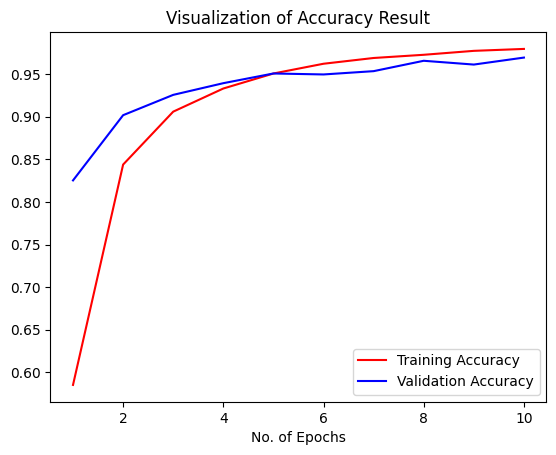

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()
plt.show()

## Some Other metric for model evaluation

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,   #(modified) shuflle = false -> means class name should pass sequentially
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape       #here it is giving 38 classes probabilities for each image

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 545s 31ms/step


(array([[1.0000000e+00, 1.4772478e-11, 7.1796161e-13, ..., 3.6396894e-20,
         2.1414939e-18, 4.3067753e-16],
        [1.0000000e+00, 1.2519030e-11, 2.8440688e-13, ..., 5.7870885e-25,
         2.1985569e-20, 2.2075925e-19],
        [1.0000000e+00, 3.9907793e-13, 4.2847247e-13, ..., 1.2473960e-22,
         2.6160861e-19, 4.0322972e-16],
        ...,
        [1.4613828e-11, 4.3814748e-13, 9.5862573e-10, ..., 4.5511776e-12,
         8.2911087e-13, 9.9999785e-01],
        [5.0867253e-12, 4.2482826e-14, 3.2133091e-11, ..., 6.1112109e-12,
         8.8024401e-13, 1.0000000e+00],
        [9.8085979e-17, 3.6259197e-17, 6.9897593e-16, ..., 4.9775056e-19,
         9.9586204e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
# This tells you that your test dataset contains 17,572 samples, and for each sample, the model predicts probabilities for 38 classes
# The first value (1.0000000e+00) means the model is very confident that the sample belongs to the first class.

In [35]:
predicted_categories = tf.argmax(y_pred, axis=1)      #argmax gives me the maximum value predicted in y_pred and axis =1 (means return index in coloumn wise )

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
# A tensor of shape (17572,), meaning there is one predicted class index for each of the 17,572 samples.
# The first three samples are predicted to belong to class 0.
#The last three samples are predicted to belong to class 37.

In [37]:
true_categories = tf.concat([y for x, y in test_set], axis=0)

In [38]:
true_categories 

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.96      0.97       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.98      0.97      0.97       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.89      0.91       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.98      0.

In [45]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[484,   2,   3, ...,   0,   0,   0],
       [  2, 483,   2, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 441,   0],
       [  0,   0,   0, ...,   0,   0, 476]])

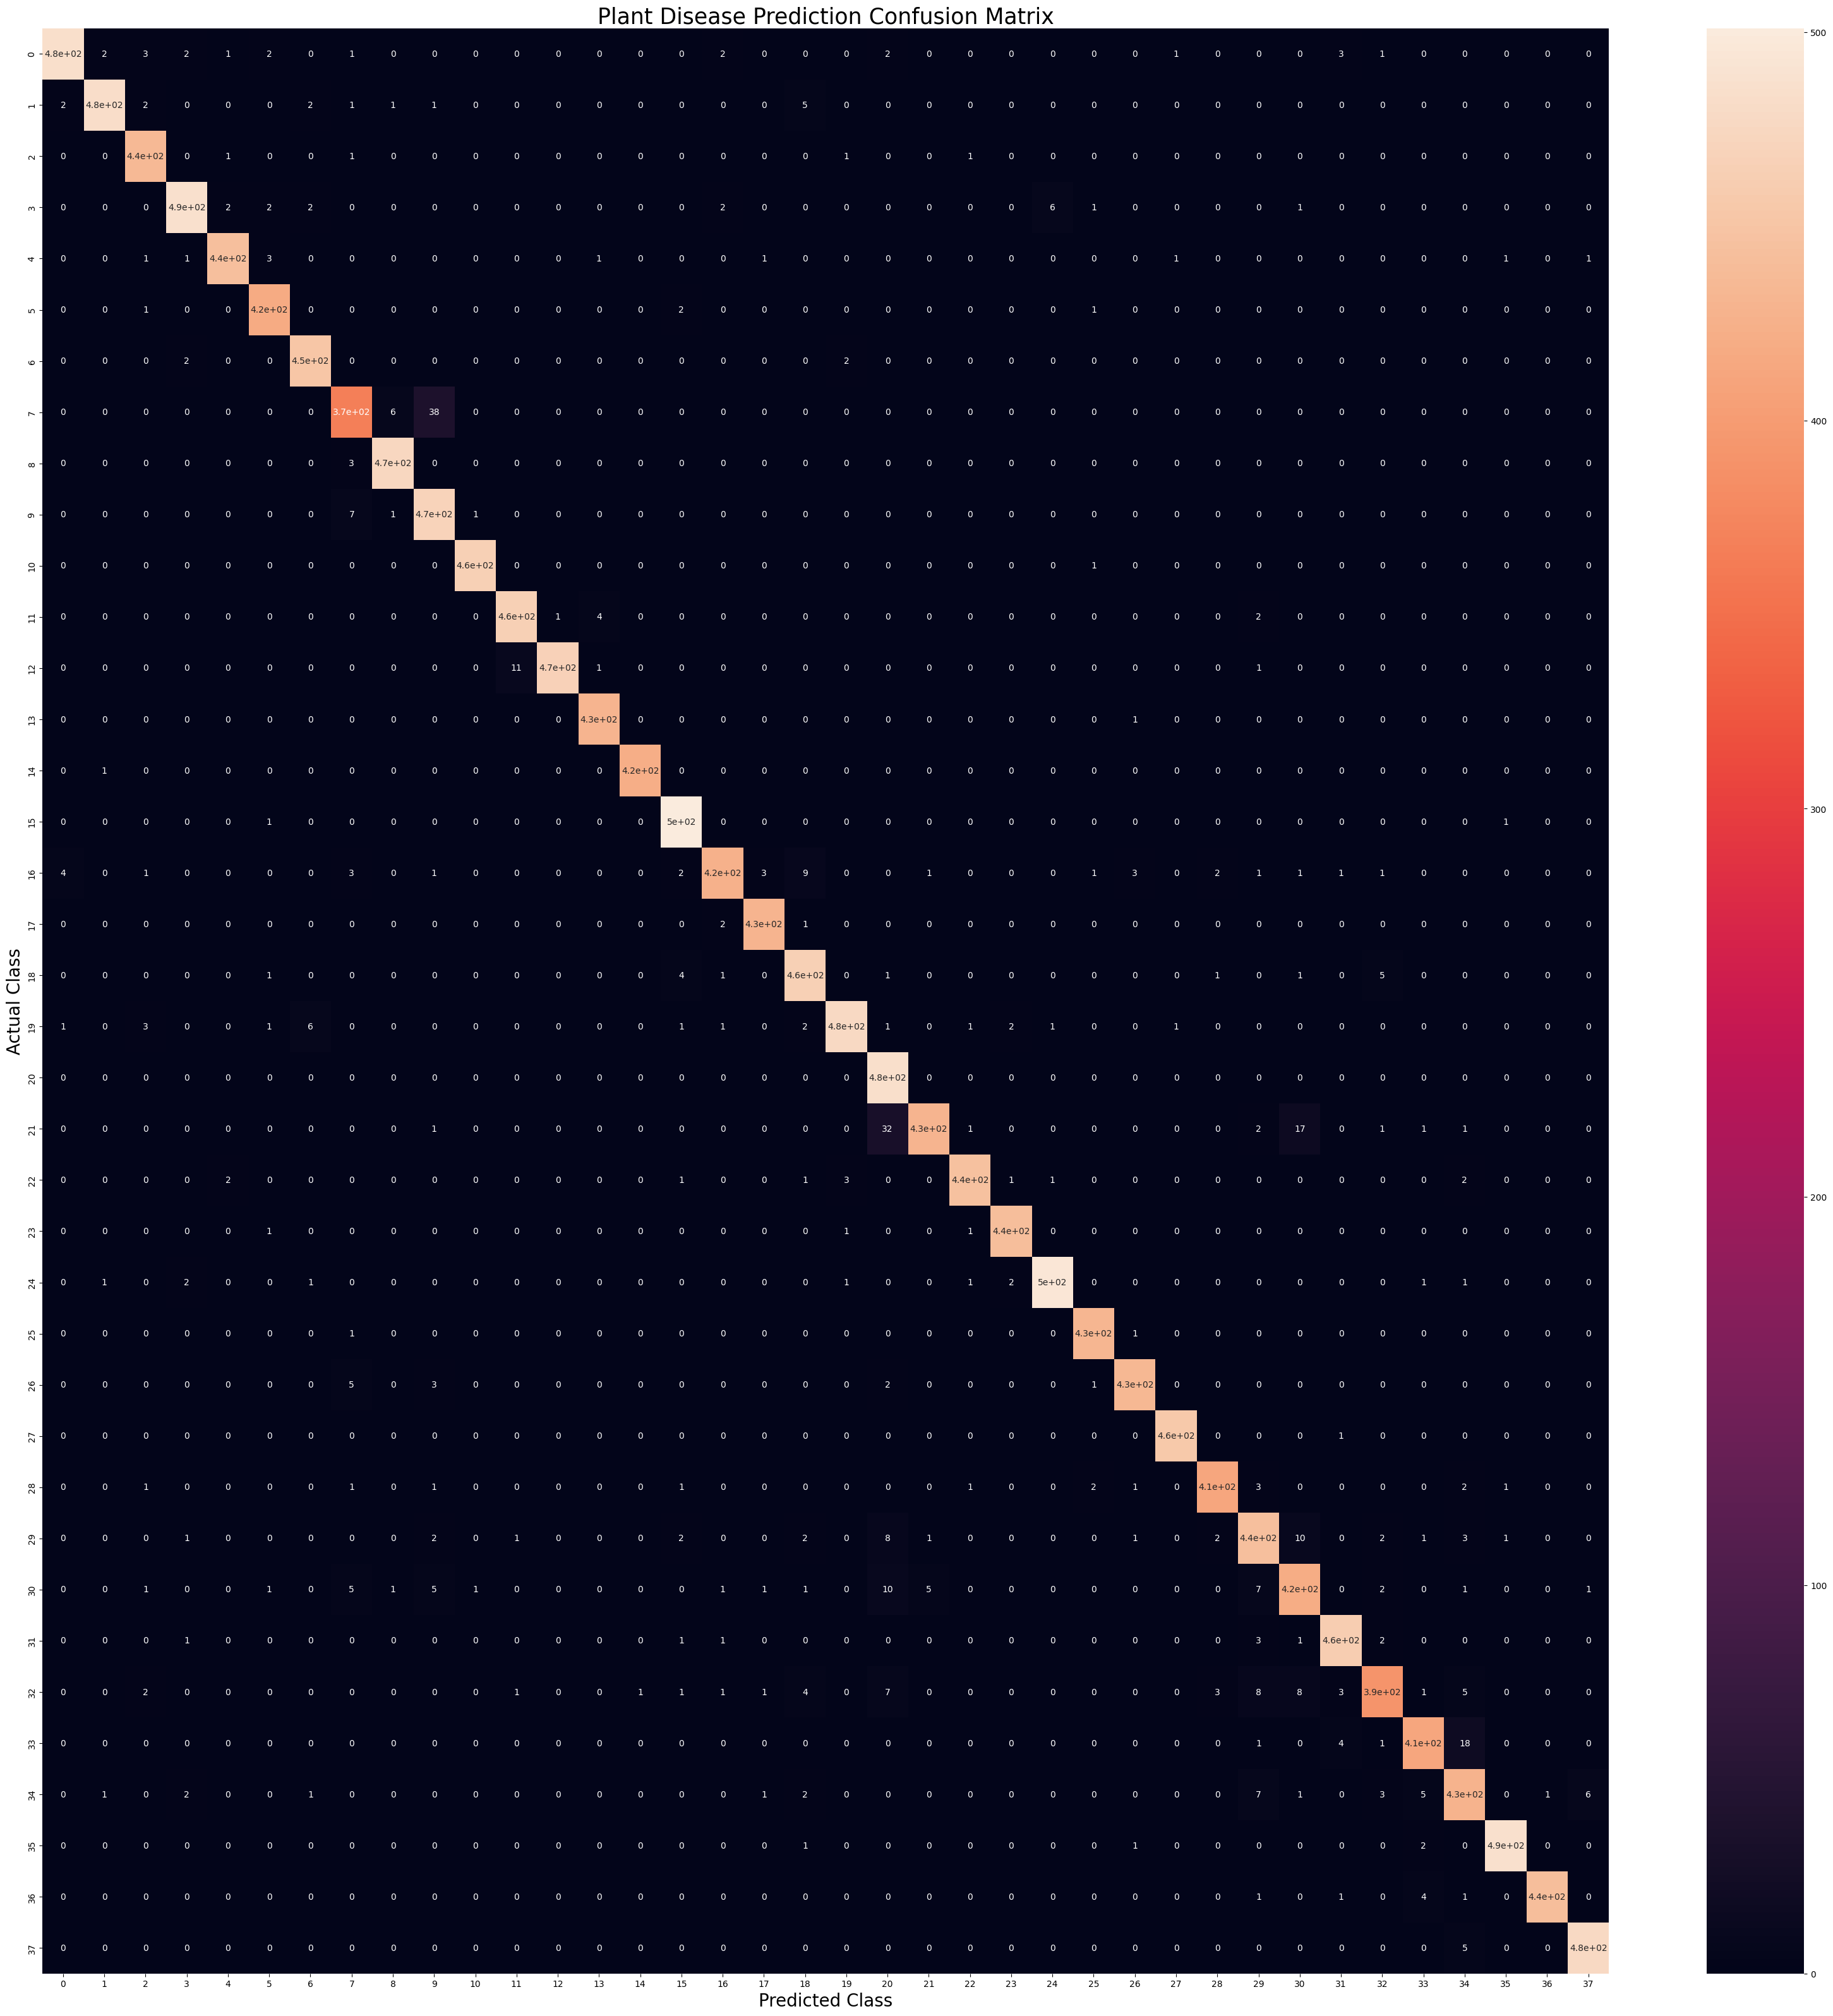

In [46]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})     #annot if true write the data values in each cell

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()